<a href="https://colab.research.google.com/github/jhengineer/DeepLearning/blob/main/KNeighborsRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

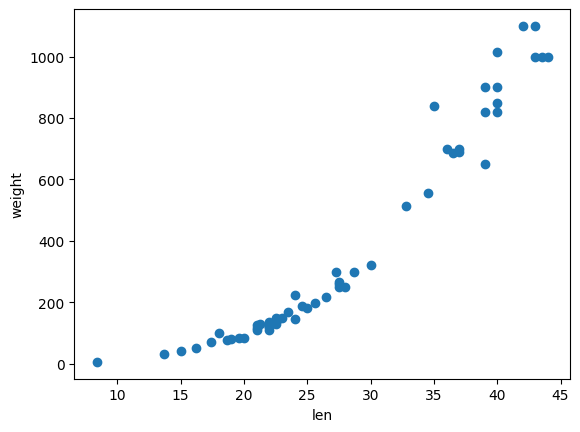

In [1]:
'''
3장... 회귀라는데?
지금까지는 classification을 했는데.
3장은 regression 즉, 연속적인 수치를 예측하는거야.
but the logistic regression is not regression but classification.

'''

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

plt.scatter(perch_length, perch_weight)
plt.xlabel('len')
plt.ylabel('weight')
plt.show()


In [2]:
'''at sklearn, you need to prepare the input data(train/test) must be a column array.
so you have to transfrom the row array to col array using reshape() method.

'''

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)  # ex) [1,2,3] = [[1],[2],[3]]
test_input = test_input.reshape(-1, 1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

print(knr.score(test_input, test_target))

'''
sklearn의 score값은 R제곱인데, 1에 가까울수록 좋다.
R2 = 1- (Target - Prediction)^2 합 / (Target - Mean(Target))^2 합
의미가 뭐냐? 분자는 numerator 는 타겟값과 예측값의 오차의 합을 / 예측없이 그냥 평균과의 차이 즉 분산(variance)을 나누는것인데,
모델 오차가 분산중, 분산대비 얼마나 큰지 나타내는것, 즉 분자값 오차가 적으면 적을수록 1에 수렴. converges to 1

'''

from sklearn.metrics import mean_absolute_error #평균절대갑오차

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)

print(mae)



0.992809406101064
19.157142857142862


In [4]:
'''
under fitting  issue is trained model is too little sample
피팅샘플이 너무 적어서. 아래 예시처럼 train과 test를 같은 dataset을 썼는데도 score가 1이 안나오고
오히려 train 과 test set을 다르게 썼을때보다 score is lower. 말이 되냐고? that doesn't make any sense!

over fitting  issue is trained model is too much sample
샘플이 너무 많아 과하게 0.9999가 되는거고

n_neighbors 의 갯수를 줄이면, over fitting되고 n_neighbors 의 갯수를 늘리면 under fitting이 된다.

그래서!!
neighbor의 수를 adjust해서 train_score가 test_scroe보다 살짝 높게 나오게 조정한다.
'''

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(train_input, train_target) # 0.969.. underfitting

print(knr.score(train_input, train_target))

knr = KNeighborsRegressor()
knr.fit(test_input, test_target)
knr.score(test_input, test_target) # 0.8461256810611227.. underfitting

print(knr.score(test_input, test_target))

#so then adjust the numers that is indicated neighbor.

knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))




0.9698823289099254
0.8461256810611227
0.9804899950518966
0.9746459963987609
